In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train=pd.read_csv('train.csv')

In [64]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


# data exploration and preprocessing for train dataset

In [65]:
train.info() #information about the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [66]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [67]:
train["form_field47"].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [68]:
train["default_status"].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [69]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [70]:
train.drop('Applicant_ID',axis=1,inplace=True) #removing applicant_id column

Data visualization

Text(0, 0.5, 'count')

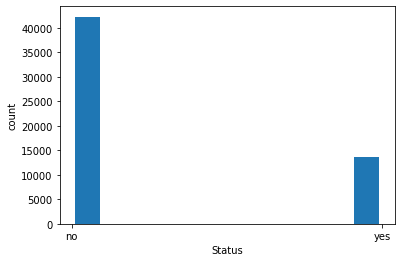

In [71]:
plt.hist(train["default_status"],rwidth=0.8)
plt.xlabel("Status")
plt.ylabel("count")

Text(0.5, 1.0, 'Frequency')

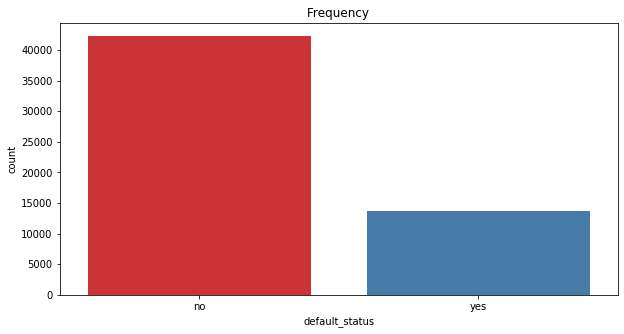

In [72]:
fig =plt.figure(figsize=(10,5))
sns.countplot(train["default_status"],palette='Set1')
plt.title('Frequency')

Text(0, 0.5, 'count')

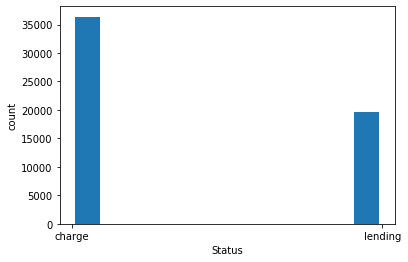

In [73]:
plt.hist(train["form_field47"],rwidth=0.8)
plt.xlabel("Status")
plt.ylabel("count")

Text(0.5, 1.0, 'Frequency')

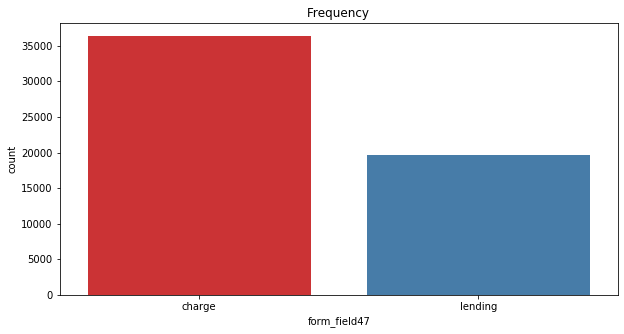

In [74]:
fig =plt.figure(figsize=(10,5))
sns.countplot(train["form_field47"],palette='Set1')
plt.title('Frequency')

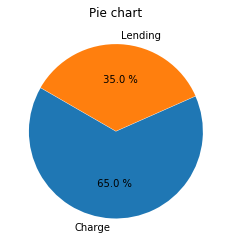

In [75]:
age_size = train.groupby('form_field47').size()
plt.pie(age_size, startangle=150, explode=[0.005,0],autopct='% 1.1f %%',shadow=False, labels=['Charge','Lending'])
plt.title('Pie chart')
plt.show()

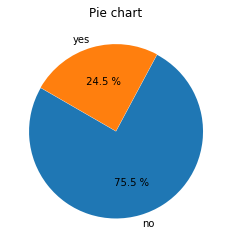

In [76]:
age_size = train.groupby('default_status').size()
plt.pie(age_size, startangle=150, explode=[0.005,0],autopct='% 1.1f %%',shadow=False, labels=['no','yes'])
plt.title('Pie chart')
plt.show()

Text(0.5, 1.0, 'Frequency')

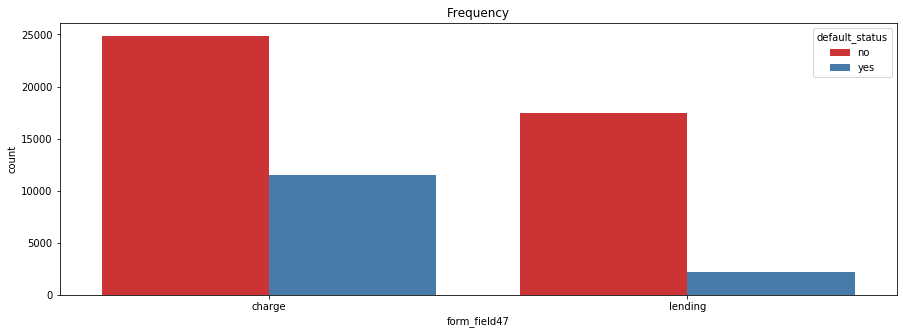

In [79]:
fig =plt.figure(figsize=(15,5))
sns.countplot(train['form_field47'], hue=train['default_status'], palette='Set1')
plt.title('Frequency')

Feature Engineering

In [80]:
train['collateral_salary'] = train.form_field15 - train.form_field14
train['credit*risk'] = train['form_field1'] * train['form_field2']

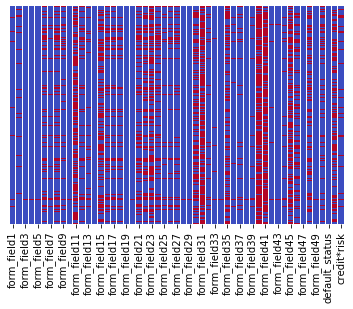

In [81]:
#visualizing the missing values i.e red color
sns.heatmap(train.isnull(),cmap='coolwarm',yticklabels=False,cbar=False)

 filling missing values

In [82]:
train.fillna(-999,inplace=True,axis=1) #filling the missing values with -999

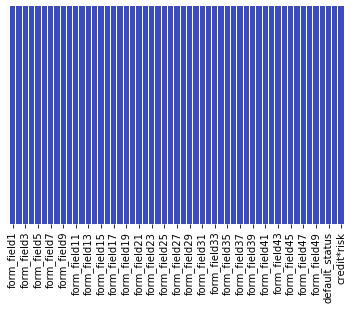

In [83]:
sns.heatmap(train.isnull(),cmap='coolwarm',yticklabels=False,cbar=False)

In [84]:
#transforming the object values to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['form_field47']=le.fit_transform(train['form_field47'])
train["default_status"]=le.fit_transform(train["default_status"])

In [19]:
test=pd.read_csv('Test.csv') #reading the test values

In [20]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


# data exploration and preprocessing for test dataset

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applicant_ID  24000 non-null  object 
 1   form_field1   22890 non-null  float64
 2   form_field2   22291 non-null  float64
 3   form_field3   23854 non-null  float64
 4   form_field4   23854 non-null  float64
 5   form_field5   23854 non-null  float64
 6   form_field6   18396 non-null  float64
 7   form_field7   21769 non-null  float64
 8   form_field8   18396 non-null  float64
 9   form_field9   20600 non-null  float64
 10  form_field10  23853 non-null  float64
 11  form_field11  10602 non-null  float64
 12  form_field12  19817 non-null  float64
 13  form_field13  21537 non-null  float64
 14  form_field14  24000 non-null  int64  
 15  form_field15  14408 non-null  float64
 16  form_field16  18526 non-null  float64
 17  form_field17  19305 non-null  float64
 18  form_field18  19631 non-nu

In [22]:
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,...,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,...,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,...,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,...,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,...,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+07,1.318126e+07,...,167.078250,137.207250,0.628573,10.100000,0.756544,0.000000,0.000000,1.195997e+03,1.254155,5.007093e-01
max,3900.000000,22.315050,34.541400,206.452800,297.885600,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,...,401.413500,211.693500,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,24.000000,2.524591e+08


In [23]:
test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

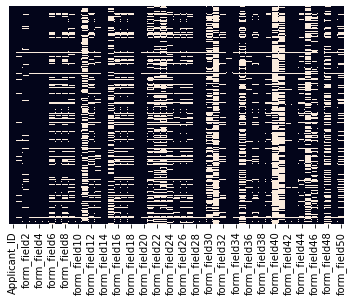

In [24]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False) #visualizing the missing values

In [25]:
test.drop('Applicant_ID',axis=1,inplace=True)

Feature Engineering

In [26]:
test['collateral_salary'] = test["form_field15"]- test["form_field14"]
test['credit*risk'] = test['form_field1'] * test['form_field2']

filling the missing values

In [27]:
test.fillna(-999,inplace=True,axis=1)

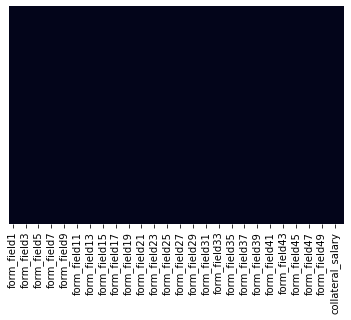

In [28]:
#visualizing values after filling the missing values
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [29]:
#transforming the object values
test['form_field47']=le.fit_transform(test['form_field47'])

# model building

In [30]:
x=(train.drop('default_status',axis='columns'))

In [31]:
y=train['default_status']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

# Algorithm/ Model 1:Random Forest

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [34]:
rfc= RandomForestClassifier(n_jobs= 1,random_state = 40,n_estimators=50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=1, random_state=40)

In [35]:
rfc_pred=rfc.predict_proba(x_test)[:,1]

In [36]:
rfc.predict_proba(x_test)

array([[0.98, 0.02],
       [0.24, 0.76],
       [0.34, 0.66],
       ...,
       [0.36, 0.64],
       [0.88, 0.12],
       [0.5 , 0.5 ]])

In [37]:
roc_auc_score(y_test,rfc_pred)

0.8299978105923973

# hyperparameter optimization

In [38]:
params={
    "learning_rate"   :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"       :[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma"           :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7,0.8,0.9,1.0]
}

In [39]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        

In [40]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost as xgb
xgbmodel=xgb.XGBClassifier()
random_search=RandomizedSearchCV(xgbmodel,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [41]:
from datetime import datetime
start_time=timer(None)
random_search.fit(x,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.0min finished


In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 1.0}

# Algorithm/ Model 2:XGBOOST

In [44]:
import xgboost as xgb
xgbmodel=xgb.XGBClassifier(base_score=0.50, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
xgb_pred=xgbmodel.predict_proba(x_test)[:,1]

In [46]:
xgbmodel.predict_proba(x_test)

array([[0.96881866, 0.03118133],
       [0.28941566, 0.71058434],
       [0.28625387, 0.71374613],
       ...,
       [0.17159069, 0.8284093 ],
       [0.8330787 , 0.1669213 ],
       [0.6911129 , 0.30888712]], dtype=float32)

In [47]:
roc_auc_score(y_test,xgb_pred)

0.8428343940760267

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbmodel,x,y,cv=5)

In [49]:
score.mean()

0.8080714285714287

In [50]:
pred=xgbmodel.predict_proba(test)[:,1]
pred

array([0.29702893, 0.25769103, 0.3488701 , ..., 0.2725616 , 0.48598555,
       0.17374215], dtype=float32)

In [51]:
sub=pd.read_csv('SampleSubmission.csv')
sub['default_status']=pred
sub.to_csv('SampleSubmission.csv',index=False)

In [52]:
sub.head(10)

,Applicant_ID,default_status
0,Apcnt_1000032,0.297029
1,Apcnt_1000048,0.257691
2,Apcnt_1000052,0.348870
3,Apcnt_1000076,0.662921
4,Apcnt_1000080,0.132597
5,Apcnt_1000084,0.376756
6,Apcnt_1000104,0.344513
7,Apcnt_1000116,0.607983
8,Apcnt_1000128,0.418172
9,Apcnt_1000156,0.312030


# model deployment

In [ ]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()